# TP 3 - Big Data 

## Parte I

### Ejercicio 1

### Ejercicio 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import sklearn
import statsmodels.api as sm

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [86]:
EPH_hogar = pd.read_excel('usu_hogar_T123.xlsx')
EPH_hogar

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPQHJKLLCDEFKID00798130,2023,1,1,1,43,S,4,664,1,...,12.0,NaN,12,0,96,0,98,0,0,0
1,TQRMNOPPQHJLKUCDEFKID00796257,2023,1,1,1,43,S,4,1410,2,...,12.0,NaN,12,0,1,2,98,0,0,0
2,TQRMNOPPQHJMLOCDEHPJB00795718,2023,1,1,1,40,S,29,380,1,...,4.0,NaN,5,590,3,0,2,4,0,0
3,TQRMNOPPQHJNLPCDEHJGH00793308,2023,1,1,1,40,S,23,262,1,...,2.0,NaN,2,262,2,0,98,0,0,0
4,TQRMNOPPQHJNLTCDEFKID00798140,2023,1,1,1,43,S,4,859,1,...,5.0,NaN,4,1250,1,2,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16810,TQUMNOVXQHMOMOCDEFKID00798588,2023,1,1,1,43,S,4,824,1,...,1.0,NaN,1,1327,1,2,98,0,0,0
16811,TQVMNOQPWHJLKRCDEFKID00793222,2023,1,1,1,43,S,4,924,3,...,4.0,NaN,3,1032,1,0,98,0,0,0
16812,TQVMNOQXPHJOKOCDEGLDF00800077,2023,1,1,1,41,N,15,69,2,...,NaN,7.0,9,82,1,0,3,0,0,0
16813,TQVMNOSPVHKMKRCDEGLDF00799993,2023,1,1,1,41,N,15,169,2,...,NaN,2.0,2,172,1,0,2,3,0,0


In [87]:
EPH_hogar = EPH_hogar.drop(EPH_hogar[(EPH_hogar["AGLOMERADO"] != 32) & (EPH_hogar["AGLOMERADO"] != 33)].index)
EPH_hogar

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
5,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,S,33,1667,1,...,5.0,NaN,5,4580,2,3,98,0,0,0
13,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,S,33,3577,1,...,2.0,NaN,2,5915,1,2,3,6,0,0
23,TQRMNOPPQHLNKTCDEIIAD00780107,2023,1,1,1,1,S,32,3536,2,...,8.0,NaN,6,5949,1,0,98,0,0,0
26,TQRMNOPPQHLOKTCDEIJAH00719666,2023,1,1,1,1,S,33,196,1,...,8.0,NaN,9,228,1,0,98,0,0,0
29,TQRMNOPPQHMKLSCDEIIAD00801791,2023,1,1,1,1,S,32,80,2,...,7.0,NaN,4,114,1,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,TQTMNORTQHLMNUCDEIJAH00793701,2023,1,1,1,1,S,33,1679,2,...,6.0,NaN,7,2754,2,0,1,0,0,0
16786,TQTMNORTYHJOPMCDEIJAH00794674,2023,1,1,1,1,S,33,3441,2,...,12.0,NaN,12,0,1,0,2,0,0,0
16801,TQUMNOQQUHKNRUCDEIJAH00780938,2023,1,1,1,1,S,33,852,2,...,12.0,NaN,12,0,2,0,98,0,0,0
16802,TQUMNOQTRHKMPSCDEIJAH00801913,2023,1,1,1,1,S,33,2264,1,...,1.0,NaN,1,2397,1,0,97,0,0,0


### Ejercicio 3.

In [88]:
EPH_individual = pd.read_excel('usu_individual_T123.xlsx')
EPH_individual

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPPQHJKLLCDEFKID00798130,2023,1,1,1,1,43,S,4,664,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPPQHJKLLCDEFKID00798130,2023,1,1,2,1,43,S,4,664,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPPQHJLKUCDEFKID00796257,2023,1,1,1,1,43,S,4,1410,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPQHJLKUCDEFKID00796257,2023,1,1,2,1,43,S,4,1410,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
4,TQRMNOPPQHJMLOCDEHPJB00795718,2023,1,1,1,1,40,S,29,380,...,NaN,8,51660.00,4,4.0,5,4.0,NaN,5,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48633,TQVMNOSPVHKMKRCDEGLDF00799993,2023,1,1,2,1,41,N,15,169,...,2.0,2,26666.67,2,2.0,2,NaN,2.0,2,172
48634,TQVMNOSPVHKMKRCDEGLDF00799993,2023,1,1,3,1,41,N,15,169,...,2.0,2,26666.67,2,2.0,2,NaN,2.0,2,172
48635,TQVMNOVXQHMOMOCDEFKID00798676,2023,1,1,1,1,43,S,4,1115,...,NaN,8,94000.00,7,7.0,7,7.0,NaN,6,1841
48636,TQVMNOVXQHMOMOCDEFKID00798676,2023,1,1,2,1,43,S,4,1115,...,NaN,8,94000.00,7,7.0,7,7.0,NaN,6,1841


In [89]:
EPH_individual = EPH_individual.drop(EPH_individual[(EPH_individual["AGLOMERADO"] != 32) & (EPH_individual["AGLOMERADO"] != 33)].index)
EPH_individual

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
17,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,S,33,1667,...,NaN,8,60000.00,5,NaN,5,5.0,NaN,5,4580
18,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,S,33,1667,...,NaN,8,60000.00,5,NaN,5,5.0,NaN,5,4580
19,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,S,33,1667,...,NaN,8,60000.00,5,NaN,5,5.0,NaN,5,4580
20,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,S,33,1667,...,NaN,8,60000.00,5,NaN,5,5.0,NaN,5,4580
35,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,S,33,3577,...,NaN,6,32433.33,2,NaN,2,2.0,NaN,2,5915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48607,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,S,33,1467,...,NaN,9,51714.29,4,NaN,4,4.0,NaN,5,2955
48608,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,S,33,1467,...,NaN,9,51714.29,4,NaN,4,4.0,NaN,5,2955
48609,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,S,33,1467,...,NaN,9,51714.29,4,NaN,4,4.0,NaN,5,2955
48610,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,S,33,1467,...,NaN,9,51714.29,4,NaN,4,4.0,NaN,5,2955


In [169]:
EPH = EPH_individual.merge(EPH_hogar, how ='left')
EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,S,33,1667,...,2,4,0,4,2,3,98,0,0,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,S,33,1667,...,2,4,0,4,2,3,98,0,0,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,S,33,1667,...,2,4,0,4,2,3,98,0,0,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,S,33,1667,...,2,4,0,4,2,3,98,0,0,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,S,33,3577,...,2,6,2,4,1,2,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,S,33,1467,...,2,7,1,6,1,7,98,0,0,0
7615,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,S,33,1467,...,2,7,1,6,1,7,98,0,0,0
7616,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,S,33,1467,...,2,7,1,6,1,7,98,0,0,0
7617,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,S,33,1467,...,2,7,1,6,1,7,98,0,0,0


### Ejercicio 4.

In [170]:
def drop_object_columns(df):
    # Get the list of column names with data type 'object'
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Drop the 'object' columns from the DataFrame
    df = df.drop(columns=object_columns)
    
    return df

def drop_columns_with_nulls(df, threshold=0.5):
    # Calculate the threshold for null values
    null_threshold = len(df) * threshold

    # Check for columns with null values exceeding the threshold
    high_null_columns = df.columns[df.isnull().sum() > null_threshold]

    # Drop the columns with high null values
    df = df.drop(columns=high_null_columns)

    return df

def drop_rows_with_value(df, value_to_drop=99, lower_bound=0, upper_bound=20):
    for column in df.columns:
        if df[column].dtype in [int, float]:
            mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
            df = df[~((df[column] == str(value_to_drop)) & mask)]
    return df
    

### Ejercicio 5.

In [157]:
#Eliminamos columnas con todos nulos
EPH = drop_columns_with_nulls(EPH, threshold=0.5)

#Eliminamos filas con valores sin sentido

#Eliminamos valores de EDADES (CH06) menores que 0
EPH = EPH.drop(EPH[EPH["CH06"] < 0].index)

#Eliminamos valores de TIPO DE UNION (CH07) igual a 9 
EPH = EPH.drop(EPH[EPH["CH07"] == 9].index)

#Eliminamos valores de INGRESOS (P47T) menores que 0
EPH = EPH.drop(EPH[EPH["P47T"] < 0].index)

#Eliminamos valores de INGRESOS TOTALES FAMILIARES(ITF) menores que 0
EPH = EPH.drop(EPH[EPH["ITF"] < 0].index)

#Reemplazamos valores de MAS_500 por 0 y 1
EPH['MAS_500'] = EPH['MAS_500'].replace('N', 0)
EPH['MAS_500'] = EPH['MAS_500'].replace('S', 1)

#Aplicamos funcion drop object

EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,2,4,0,4,2,3,98,0,0,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,2,4,0,4,2,3,98,0,0,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,2,4,0,4,2,3,98,0,0,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,2,4,0,4,2,3,98,0,0,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,2,6,2,4,1,2,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,2,7,1,6,1,7,98,0,0,0
7615,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,2,7,1,6,1,7,98,0,0,0
7616,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,2,7,1,6,1,7,98,0,0,0
7617,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,2,7,1,6,1,7,98,0,0,0


### Ejercicio 6.

In [93]:
EPH.describe()

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,CH03,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
count,5982.0,5982.0,5982.000000,5982.000000,5982.000000,5982.0,5982.0,5982.000000,5982.000000,5982.000000,...,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000
mean,2023.0,1.0,1.044300,2.500502,0.853394,1.0,1.0,32.783183,2105.051989,2.444667,...,2.004681,3.789870,0.667335,3.122534,2.852892,0.704614,63.473086,0.683718,0.220160,0.008358
std,0.0,0.0,1.128825,1.559793,0.364910,0.0,0.0,0.412111,1129.931187,1.536883,...,0.180966,1.892746,0.990508,1.451160,11.466638,2.108932,45.901768,4.812165,2.222119,0.216206
min,2023.0,1.0,1.000000,1.000000,0.000000,1.0,1.0,32.000000,46.000000,1.000000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2023.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,33.000000,1330.000000,1.000000,...,2.000000,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,2023.0,1.0,1.000000,2.000000,1.000000,1.0,1.0,33.000000,2013.000000,2.000000,...,2.000000,4.000000,0.000000,3.000000,1.000000,0.000000,98.000000,0.000000,0.000000,0.000000
75%,2023.0,1.0,1.000000,3.000000,1.000000,1.0,1.0,33.000000,2689.000000,3.000000,...,2.000000,5.000000,1.000000,4.000000,2.000000,2.000000,98.000000,0.000000,0.000000,0.000000
max,2023.0,1.0,51.000000,13.000000,2.000000,1.0,1.0,33.000000,8423.000000,10.000000,...,9.000000,13.000000,8.000000,10.000000,99.000000,96.000000,98.000000,98.000000,98.000000,6.000000


### Ejercicio 7.

In [94]:
#Creamos una nueva columna donde agregamos un string de texto que contenga las comibinación de sexo y edad
EPH["sexo_edad"] = EPH["CH04"].astype(str) + "_" + EPH["CH06"].astype(str)

#Creamos las variables sexo y edad que pueden tomar cada uno de los valores posibles y 
#luego generamos todas las combinaciones posibles de sexo-edad
sexo = pd.Series([1, 2])
edad = pd.Series(range(104))
sexo_edad=[]
for i in sexo:
    for j in edad:
        sexo_edad.append(f"{i}_{j}")
sexo_edad

#Creamos un dataframe llamado Valores que tendrá las combinaciones posibles de sexo-edad
Valores=pd.DataFrame({'sexo_edad':sexo_edad})

#Creamos un vector con los valores de equivalencias respetando el orden del diccionario anterior
adulto_equiv= [0.35,	 0.37,	 0.46,	 0.51,	 0.55,	 0.6,	 0.64,	 0.66,	 0.68,	 
              0.69,	 0.79,	 0.82,	 0.85,	 0.9,	 0.96,	 1.0,	 1.03,	 1.04,	 
              1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 1.02,	 
              1.02,	 1.02,	 1.02,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 
              1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 1.1,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 0.83,	 
              0.83,	 0.83,	 0.83,	 0.83,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 
              0.74,	 0.74,	 0.74,	 0.74,	 0.74,	 0.35,	 0.37,	 0.46,	 0.51,	 
              0.55,	 0.60,	 0.64,	 0.66,	 0.68,	 0.69,	 0.70,	 0.72,	 0.74,	 
              0.76,	 0.76,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 
              0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.77,	 0.76,	 0.76,	 0.76,	 
              0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	 0.76,	
              0.76,	 0.76,	 0.76,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 0.67,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	
              0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63,	 0.63]

#Agregamos a nuestro dataframe dichas equivalencias
Valores["adulto_equiv"]=adulto_equiv

EPH = EPH.merge(Valores, how="left")

#A continuación sumamos el valor de equivalencia sexo-edad para cada uno de los hogares y lo almacenamos en una nueva variable que llamamos ad_equiv_hogar
ad_equiv_hogar = EPH.groupby(by="CODUSU").agg({"adulto_equiv":"sum"}).reset_index()
ad_equiv_hogar = ad_equiv_hogar.rename(columns={"adulto_equiv": "ad_equiv_hogar"})


#Nuevamente, agregamos esta nueva variable al dataframe anterior combinando por numero de hogar
EPH = EPH.merge(ad_equiv_hogar, how="left")

EPH

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,sexo_edad,adulto_equiv,ad_equiv_hogar
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,4,2,3,98,0,0,0,1_56,1.10,3.64
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,4,2,3,98,0,0,0,2_50,0.76,3.64
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,4,2,3,98,0,0,0,2_25,0.76,3.64
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,4,2,3,98,0,0,0,1_22,1.02,3.64
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,4,1,2,3,6,0,0,2_40,0.77,4.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,6,1,7,98,0,0,0,1_28,1.02,5.73
5978,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,6,1,7,98,0,0,0,2_13,0.76,5.73
5979,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,6,1,7,98,0,0,0,1_12,0.85,5.73
5980,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,6,1,7,98,0,0,0,1_6,0.64,5.73


### Ejercicio 8.

In [95]:
respondieron= EPH[EPH["ITF"]!=0]
respondieron['ITF'].min()

2500

In [96]:
norespondieron= EPH[EPH["ITF"]==0]
norespondieron['ITF'].sum()

0

In [97]:
respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]
respondieron

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\3157423302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, "ingreso_necesario"] = 57371.05 * respondieron.loc[:, "ad_equiv_hogar"]


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,sexo_edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,2,3,98,0,0,0,1_56,1.10,3.64,208830.6220
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,2,3,98,0,0,0,2_50,0.76,3.64,208830.6220
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,2,3,98,0,0,0,2_25,0.76,3.64,208830.6220
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,2,3,98,0,0,0,1_22,1.02,3.64,208830.6220
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,1,2,3,6,0,0,2_40,0.77,4.58,262759.4090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,1,7,98,0,0,0,1_28,1.02,5.73,328736.1165
5978,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,1,7,98,0,0,0,2_13,0.76,5.73,328736.1165
5979,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,1,7,98,0,0,0,1_12,0.85,5.73,328736.1165
5980,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,1,7,98,0,0,0,1_6,0.64,5.73,328736.1165


### Ejercicio 9.

In [98]:
#Creamos una función que clasifique a pobres en función a la  relación entre ingreso total reportado y el necesario
def clasificar_pobreza(row):
    if row["ITF"] < row["ingreso_necesario"]:
        pobre = 1
    else:
        pobre = 0
    return pobre

In [99]:
#Aplicamos la función a nuestro dataframe y visualizamos los resultados
respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)
respondieron

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1156415633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = respondieron.apply(clasificar_pobreza, axis=1)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,sexo_edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,3,98,0,0,0,1_56,1.10,3.64,208830.6220,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,3,98,0,0,0,2_50,0.76,3.64,208830.6220,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,3,98,0,0,0,2_25,0.76,3.64,208830.6220,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,3,98,0,0,0,1_22,1.02,3.64,208830.6220,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,2,3,6,0,0,2_40,0.77,4.58,262759.4090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,7,98,0,0,0,1_28,1.02,5.73,328736.1165,0
5978,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,7,98,0,0,0,2_13,0.76,5.73,328736.1165,0
5979,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,7,98,0,0,0,1_12,0.85,5.73,328736.1165,0
5980,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,7,98,0,0,0,1_6,0.64,5.73,328736.1165,0


### Ejercicio 10.

In [100]:
ITF_hogar = respondieron.groupby(by=['CODUSU', 'NRO_HOGAR']).agg({'ITF': 'mean', 'ingreso_necesario': 'mean' ,'PONDIH': 'sum'}).reset_index()
ITF_hogar

,CODUSU,NRO_HOGAR,ITF,ingreso_necesario,PONDIH
0,TQRMNOPPQHJNOPCDEIJAH00802435,1,240000.0,208830.6220,18320
1,TQRMNOPPQHKMQRCDEIJAH00780809,1,194600.0,262759.4090,35490
2,TQRMNOPPQHLNKTCDEIIAD00780107,1,410000.0,128511.1520,17847
3,TQRMNOPPQHLOKTCDEIJAH00719666,1,120000.0,63108.1550,228
4,TQRMNOPPQHMKLSCDEIIAD00801791,1,200000.0,80893.1805,228
...,...,...,...,...,...
1609,TQTMNOQWYHKNQLCDEIJAH00785853,1,260000.0,154328.1245,12189
1610,TQTMNORQXHMOSQCDEIJAH00802270,1,147000.0,185308.4915,15489
1611,TQTMNORTQHLMNUCDEIJAH00793701,1,320000.0,211125.4640,11016
1612,TQUMNOQTRHKMPSCDEIJAH00801913,1,27600.0,124495.1785,7191


In [101]:
ITF_hogar['pobre'] = ITF_hogar.apply(clasificar_pobreza, axis=1)
ITF_hogar

,CODUSU,NRO_HOGAR,ITF,ingreso_necesario,PONDIH,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435,1,240000.0,208830.6220,18320,0
1,TQRMNOPPQHKMQRCDEIJAH00780809,1,194600.0,262759.4090,35490,1
2,TQRMNOPPQHLNKTCDEIIAD00780107,1,410000.0,128511.1520,17847,0
3,TQRMNOPPQHLOKTCDEIJAH00719666,1,120000.0,63108.1550,228,0
4,TQRMNOPPQHMKLSCDEIIAD00801791,1,200000.0,80893.1805,228,0
...,...,...,...,...,...,...
1609,TQTMNOQWYHKNQLCDEIJAH00785853,1,260000.0,154328.1245,12189,0
1610,TQTMNORQXHMOSQCDEIJAH00802270,1,147000.0,185308.4915,15489,1
1611,TQTMNORTQHLMNUCDEIJAH00793701,1,320000.0,211125.4640,11016,0
1612,TQUMNOQTRHKMPSCDEIJAH00801913,1,27600.0,124495.1785,7191,1


In [102]:
def tasa_pobreza_hogar(pobre, ponderacion):
    tasa_pobreza = sum(pobre * ponderacion)/sum(ponderacion)
    return(tasa_pobreza)

In [103]:
tasa_pobreza_hogar(ITF_hogar['pobre'], ITF_hogar['PONDIH'])

0.4131804321422154

## Parte II

### Ejercicio 1.

In [104]:
def evalua_metodo(model, X_train, X_test, y_train, y_test, hyperparameters = {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}):
    '''
    Esta función evalua un modelo de estimación y devuelve diferentes métricas. 
    Input:
            model: es el nombre del modelo a implementar. Puede tomar los siguientes valores
                'log': modelo logístico
                'lda#': modelo de análisis discriminante lineal con # componentes
                'knn#': modelo de vecinos cercanos con # vecinos
            X_train: particion de la muestra de entrenamiento para predictores 
            y_train: particion de la muestra de entrenamiento para valores a predecir
            X_test: particion de la muestra de testeo para predictores
            y_test: particion de la muestra de testeo para valores a predecir
    Output:
            Verdadero 0: cantidad de verdaderos negativos
            Falso 1: cantidad de falsos positivos
            Falso 0: cantidad de falsos negativos
            Verdadero 1: cantidad de verdaderos positivos
            ROC_Plot: Gráfico de la curva ROC
            AUC: Área debajo de la curva ROC
            Accuracy: nivel de accuracy
    '''
    model1 = model[:3]
    if model1 == 'log':
        m = LogisticRegression(max_iter = hyperparameters['max_iter'], penalty=hyperparameters['penalty'], C=hyperparameters['C'], solver = hyperparameters['solver']).fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == 'lda':
        components = int(''.join([char for char in model if char.isnumeric()]))
        m = LinearDiscriminantAnalysis(n_components=components)
        m = m.fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    elif model1 == 'knn':
        neighbors = int(''.join([char for char in model if char.isnumeric()]))
        m = KNeighborsClassifier(n_neighbors=neighbors)
        m = m.fit(X_train, y_train)
        y_test_score = m.predict_proba(X_test)[:,1]
        y_test_pred = m.predict(X_test)
    else:
        print('Modelo no especificado correctamente')
    
    results = {}
    
    #Matriz de confusion
    matriz_confusion = confusion_matrix(y_test, y_test_pred)
    tn, fp , fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    results["Verdadero 0"] = tn
    results["Falso 1"] = fp
    results["Falso 0"] = fn
    results["Verdadero 1"] = tp
    
    #Curva ROC
    auc = roc_auc_score(y_test, y_test_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=model)
    display.plot()  
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plot_filename = "roc_curve.png"
    results['ROC_Plot'] = plot_filename
    plt.close()
    
    #AUC
    results['AUC'] = auc
    
    #Accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    results['Accuracy'] = accuracy
    
    #ECM
    ecm = mean_squared_error(y_test, y_test_pred)
    results['ECM'] = ecm
    
    #Coefficients
    if model1 == 'knn':
        coef = []
    else:
        coef = m.coef_
        results['Coefficients'] = coef
    return(results)

### Ejercicio 2.

In [105]:
def cross_validation(model, K, X, y, hyperparameters = {'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}):
    ecms = pd.DataFrame(columns=["modelo", "hyperparameters","particion", "ecm", 'Coefficients'])
    kf = KFold(n_splits=K, shuffle=True, random_state=100)
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        sc = StandardScaler()
        X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
        X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
        results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparameters)
        ecm = results['ECM']
        ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
    ecms = ecms.astype({"particion":int})
    return(ecms)
    

### Ejercicio 3.

In [106]:
def evalua_config(model, K, X, y, hyperparam=[{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}]):
    min_ecm = np.Inf
    if model == 'log':
        for i in hyperparam:
            hyperparameters = i
            a = cross_validation(model, K, X, y, hyperparameters)
            ecms = a
            prom = ecms['ecm'].mean()
            if prom < min_ecm:
                min_ecms = prom
                hyper = hyperparameters
            else:
                min_ecms = min_ecms
                hyper = hyper
            return(hyper, min_ecms)
    else:
        return('Modelo no compatible con esta función')

### Ejercicio 4.

In [107]:
def evalua_metodos_multiples(models, X, y, K, hyperparam=[{'max_iter':10000, 'penalty': None, 'C': 1, 'solver': 'saga'}]):
    resultados = pd.DataFrame(columns=["modelo", "hiperparámetros", "Verdadero 0", "Falso 1", "Falso 0", "Verdadero 1", "ROC_Plot", "AUC", "Accuracy", "ECM"])
    for model in models:
        if model == 'log':
            h = evalua_config(model, K, X, y, hyperparam)
            hyperparameters = h[0]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
            sc = StandardScaler()
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparameters)
            resultados = resultados.append({"modelo": model, "hiperparámetros": hyperparameters, "Verdadero 0":results["Verdadero 0"], "Falso 1":results["Falso 1"], "Falso 0":results["Falso 0"], "Verdadero 1":results["Verdadero 1"], "ROC_Plot":results["ROC_Plot"], "AUC":results["AUC"], "Accuracy":results["Accuracy"], "ECM":results["ECM"]}, ignore_index=True)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
            sc = StandardScaler()
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            results = evalua_metodo(model, X_train_transformed, X_test_transformed, y_train, y_test, hyperparam)
            resultados = resultados.append({"modelo": model, "hiperparámetros": hyperparameters, "Verdadero 0":results["Verdadero 0"], "Falso 1":results["Falso 1"], "Falso 0":results["Falso 0"], "Verdadero 1":results["Verdadero 1"], "ROC_Plot":results["ROC_Plot"], "AUC":results["AUC"], "Accuracy":results["Accuracy"], "ECM":results["ECM"]}, ignore_index=True)
    return(resultados)

## Parte III

### Ejercicio 1

In [108]:
#Eliminamos variables de "Ingresos de la ocupacion principal de los asalariados"
respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos de la ocupacion principal"
respondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos de otras ocupaciones"
respondieron.drop(["TOT_P12"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["TOT_P12"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso total individual"
respondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["P47T", "DECINDR", "IDECINDR", "RDECINDR", "PDECINDR", "ADECINDR", "PONDII"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingresos no laborales"
respondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso total familiar"
respondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["ITF", "DECIFR", "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR"], axis=1, inplace = True, errors='ignore')

#Eliminamos variables de "Ingreso per cápita familiar"
respondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"], axis=1, inplace = True, errors='ignore')

#Eliminamos las columnas: adulto_equiv, ad_equiv_hogar e ingreso_necesario
respondieron.drop(["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario"], axis=1, inplace = True, errors='ignore')
norespondieron.drop(["adulto_equiv", "ad_equiv_hogar"], axis=1, inplace = True, errors='ignore')

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1682715150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1682715150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(["PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"], axis=1, inplace = True, errors='ignore')
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1682715150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [109]:
respondieron = respondieron.reset_index(drop = True)
norespondieron = norespondieron.reset_index(drop = True)

In [110]:
respondieron

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,sexo_edad,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,1,1,33,1667,...,0,4,2,3,98,0,0,0,1_56,0
1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,2,1,1,1,33,1667,...,0,4,2,3,98,0,0,0,2_50,0
2,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,3,1,1,1,33,1667,...,0,4,2,3,98,0,0,0,2_25,0
3,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,4,1,1,1,33,1667,...,0,4,2,3,98,0,0,0,1_22,0
4,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,1,1,33,3577,...,2,4,1,2,3,6,0,0,2_40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,3,1,1,1,33,1467,...,1,6,1,7,98,0,0,0,1_28,0
4176,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,4,1,1,1,33,1467,...,1,6,1,7,98,0,0,0,2_13,0
4177,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,5,1,1,1,33,1467,...,1,6,1,7,98,0,0,0,1_12,0
4178,TQUMNORTQHLMNUCDEIJAH00780261,2023,1,1,6,0,1,1,33,1467,...,1,6,1,7,98,0,0,0,1_6,0


In [111]:
respondieron1 = respondieron.dropna()
respondieron1 = drop_object_columns(respondieron1)
y = respondieron1['pobre']
X = respondieron1.drop(columns = ['pobre'])
X = sm.add_constant(X)


### Ejercicio 2.

In [112]:
models = ['log', 'lda1', 'knn3']
hyperparam = [{'max_iter':10000, 'penalty': 'l1', 'C': 1, 'solver': 'saga'},
             {'max_iter':10000, 'penalty': 'l2', 'C': 1, 'solver': 'saga'}]
K = 5
evalua_metodos_multiples(models, X, y, K, hyperparam)

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

,modelo,hiperparámetros,Verdadero 0,Falso 1,Falso 0,Verdadero 1,ROC_Plot,AUC,Accuracy,ECM
0,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",676,81,127,370,roc_curve.png,0.913173,0.834131,0.165869
1,lda1,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",684,73,148,349,roc_curve.png,0.906605,0.823764,0.176236
2,knn3,"{'max_iter': 10000, 'penalty': 'l1', 'C': 1, '...",686,71,155,342,roc_curve.png,0.872516,0.819777,0.180223


### Ejercicio 3.

### Ejercicio 4.

### Ejercicio 5.

In [113]:
N = list(range(-5, 6))
reg = 'l1'
K = 10
model = 'log'
hyperparam_lasso = []
for n in N:
    hyperparameters = {'max_iter': 10000, 'penalty': reg, 'C': 1 / (10**n), 'solver': 'saga'}
    hyperparam_lasso.append(hyperparameters)

In [114]:
N = list(range(-5, 6))
reg = 'l2'
K = 10
model = 'log'
hyperparam_ridge = []
for n in N:
    hyperparameters = {'max_iter': 10000, 'penalty': reg, 'C': 1 / (10**n), 'solver': 'saga'}
    hyperparam_ridge.append(hyperparameters)

In [115]:
best_lasso = evalua_config(model, K, X, y, hyperparam_lasso)
best_ridge = evalua_config(model, K, X, y, hyperparam_ridge)

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

In [116]:
lamda_lasso = 1/best_lasso[0]['C']
lamda_ridge = 1/best_ridge[0]['C']
print('El lamda óptimo para lasso: ', lamda_lasso)
print('El lamda óptimo para ridge: ', lamda_ridge)

El lamda óptimo para lasso:  1e-05
El lamda óptimo para ridge:  1e-05


In [117]:
N = list(range(-5, 6))
reg = ['l1', 'l2']
K = 10
model = 'log'
punto_5 = pd.DataFrame(columns=["modelo", "hyperparameters","particion", "ecm", 'Coefficients'])
for r in reg:
    for n in N:
        hyperparam = {'max_iter':10000, 'penalty': r, 'C': 1/(10**n), 'solver': 'saga'}
        resultados = cross_validation(model, K, X, y, hyperparam)
        punto_5 = punto_5.append(resultados)

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\544701107.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  punto_5 = punto_5.append(resultados)
C:\Users\manue\AppData\Local\Te

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparame

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\2137356152.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"modelo": model, "hyperparameters": hyperparameters, "particion": i, "ecm": ecm, 'Coefficients': results['Coefficients']}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11976\544701107.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  punto_5 = punto_5.append(resultados)
C:\Users\manue\AppData\Local\Te

In [118]:
punto_5 = punto_5.reset_index(drop = True)
punto_5

,modelo,hyperparameters,particion,ecm,Coefficients
0,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",0,0.191388,"[[0.0, 0.0, 0.11743634808999288, -0.6085534102..."
1,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",1,0.157895,"[[0.0, 0.0, 0.04477805489241315, -0.6098892434..."
2,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",2,0.165072,"[[0.0, 0.0, -0.0188720711513393, -0.5364865399..."
3,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",3,0.191388,"[[0.0, 0.0, -0.011579080353195128, -0.59588161..."
4,log,"{'max_iter': 10000, 'penalty': 'l1', 'C': 9999...",4,0.148325,"[[0.0, 0.0, -0.013861273694336785, -0.55719455..."
...,...,...,...,...,...
215,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",5,0.351675,"[[0.0, 0.0, -0.0002505739663438682, 0.00495805..."
216,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",6,0.425837,"[[0.0, 0.0, -0.00034166317427715843, 0.0047747..."
217,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",7,0.404306,"[[0.0, 0.0, -0.000332268190184168, 0.004683054..."
218,log,"{'max_iter': 10000, 'penalty': 'l2', 'C': 1e-0...",8,0.346890,"[[0.0, 0.0, -0.00032840882946507267, 0.0048374..."


In [119]:
punto_5_2 = pd.concat([punto_5.drop(['hyperparameters'], axis=1), punto_5['hyperparameters'].apply(pd.Series)], axis=1)
punto_5_2

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver
0,log,0,0.191388,"[[0.0, 0.0, 0.11743634808999288, -0.6085534102...",10000,l1,100000.00000,saga
1,log,1,0.157895,"[[0.0, 0.0, 0.04477805489241315, -0.6098892434...",10000,l1,100000.00000,saga
2,log,2,0.165072,"[[0.0, 0.0, -0.0188720711513393, -0.5364865399...",10000,l1,100000.00000,saga
3,log,3,0.191388,"[[0.0, 0.0, -0.011579080353195128, -0.59588161...",10000,l1,100000.00000,saga
4,log,4,0.148325,"[[0.0, 0.0, -0.013861273694336785, -0.55719455...",10000,l1,100000.00000,saga
...,...,...,...,...,...,...,...,...
215,log,5,0.351675,"[[0.0, 0.0, -0.0002505739663438682, 0.00495805...",10000,l2,0.00001,saga
216,log,6,0.425837,"[[0.0, 0.0, -0.00034166317427715843, 0.0047747...",10000,l2,0.00001,saga
217,log,7,0.404306,"[[0.0, 0.0, -0.000332268190184168, 0.004683054...",10000,l2,0.00001,saga
218,log,8,0.346890,"[[0.0, 0.0, -0.00032840882946507267, 0.0048374...",10000,l2,0.00001,saga


In [120]:
punto_5_2['lamda'] = 1/punto_5_2['C']
punto_5_2

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver,lamda
0,log,0,0.191388,"[[0.0, 0.0, 0.11743634808999288, -0.6085534102...",10000,l1,100000.00000,saga,0.00001
1,log,1,0.157895,"[[0.0, 0.0, 0.04477805489241315, -0.6098892434...",10000,l1,100000.00000,saga,0.00001
2,log,2,0.165072,"[[0.0, 0.0, -0.0188720711513393, -0.5364865399...",10000,l1,100000.00000,saga,0.00001
3,log,3,0.191388,"[[0.0, 0.0, -0.011579080353195128, -0.59588161...",10000,l1,100000.00000,saga,0.00001
4,log,4,0.148325,"[[0.0, 0.0, -0.013861273694336785, -0.55719455...",10000,l1,100000.00000,saga,0.00001
...,...,...,...,...,...,...,...,...,...
215,log,5,0.351675,"[[0.0, 0.0, -0.0002505739663438682, 0.00495805...",10000,l2,0.00001,saga,100000.00000
216,log,6,0.425837,"[[0.0, 0.0, -0.00034166317427715843, 0.0047747...",10000,l2,0.00001,saga,100000.00000
217,log,7,0.404306,"[[0.0, 0.0, -0.000332268190184168, 0.004683054...",10000,l2,0.00001,saga,100000.00000
218,log,8,0.346890,"[[0.0, 0.0, -0.00032840882946507267, 0.0048374...",10000,l2,0.00001,saga,100000.00000


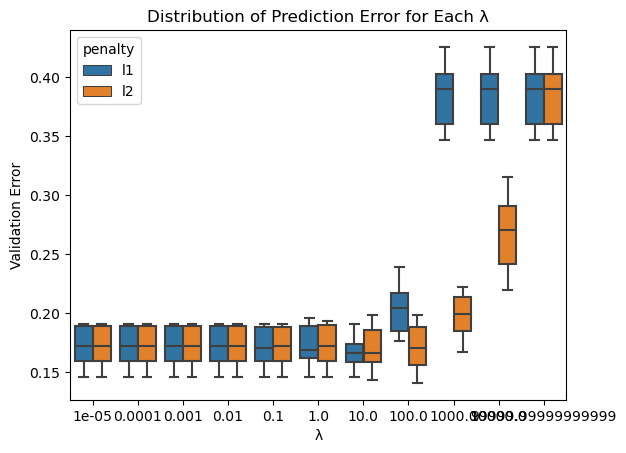

In [121]:
plt.figure()
sns.boxplot(x='lamda', y='ecm', data=punto_5_2, hue='penalty')
plt.title('Distribution of Prediction Error for Each λ')
plt.xlabel('λ')
plt.ylabel('Validation Error')
plt.show()

In [122]:
punto_5_3 = punto_5_2.drop(punto_5_2[punto_5_2['penalty'] == 'l2'].index)
punto_5_3

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver,lamda
0,log,0,0.191388,"[[0.0, 0.0, 0.11743634808999288, -0.6085534102...",10000,l1,100000.00000,saga,0.00001
1,log,1,0.157895,"[[0.0, 0.0, 0.04477805489241315, -0.6098892434...",10000,l1,100000.00000,saga,0.00001
2,log,2,0.165072,"[[0.0, 0.0, -0.0188720711513393, -0.5364865399...",10000,l1,100000.00000,saga,0.00001
3,log,3,0.191388,"[[0.0, 0.0, -0.011579080353195128, -0.59588161...",10000,l1,100000.00000,saga,0.00001
4,log,4,0.148325,"[[0.0, 0.0, -0.013861273694336785, -0.55719455...",10000,l1,100000.00000,saga,0.00001
...,...,...,...,...,...,...,...,...,...
105,log,5,0.351675,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10000,l1,0.00001,saga,100000.00000
106,log,6,0.425837,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10000,l1,0.00001,saga,100000.00000
107,log,7,0.404306,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10000,l1,0.00001,saga,100000.00000
108,log,8,0.346890,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10000,l1,0.00001,saga,100000.00000


In [123]:
def coef(coef):
    c = coef[0]
    return(c)

def proportion_of_zeros(arr):
    if arr == []:
        return 0.0
    
    zero_count = (arr == 0).sum()
    proportion = zero_count / len(arr)
    
    return proportion


In [124]:
punto_5_3['Coefficients'] = punto_5_3['Coefficients'].apply(coef)
punto_5_3

,modelo,particion,ecm,Coefficients,max_iter,penalty,C,solver,lamda
0,log,0,0.191388,"[0.0, 0.0, 0.11743634808999288, -0.60855341028...",10000,l1,100000.00000,saga,0.00001
1,log,1,0.157895,"[0.0, 0.0, 0.04477805489241315, -0.60988924349...",10000,l1,100000.00000,saga,0.00001
2,log,2,0.165072,"[0.0, 0.0, -0.0188720711513393, -0.53648653997...",10000,l1,100000.00000,saga,0.00001
3,log,3,0.191388,"[0.0, 0.0, -0.011579080353195128, -0.595881610...",10000,l1,100000.00000,saga,0.00001
4,log,4,0.148325,"[0.0, 0.0, -0.013861273694336785, -0.557194553...",10000,l1,100000.00000,saga,0.00001
...,...,...,...,...,...,...,...,...,...
105,log,5,0.351675,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10000,l1,0.00001,saga,100000.00000
106,log,6,0.425837,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10000,l1,0.00001,saga,100000.00000
107,log,7,0.404306,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10000,l1,0.00001,saga,100000.00000
108,log,8,0.346890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10000,l1,0.00001,saga,100000.00000


In [125]:
punto_5_3['% Coef = 0'] = punto_5_3['Coefficients'].apply(proportion_of_zeros)
punto_5_3['% Coef = 0']

C:\Users\manue\AppData\Local\Temp\ipykernel_11976\1392224897.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if arr == []:


0      0.061224
1      0.061224
2      0.061224
3      0.061224
4      0.061224
         ...   
105    1.000000
106    1.000000
107    1.000000
108    1.000000
109    1.000000
Name: % Coef = 0, Length: 110, dtype: float64

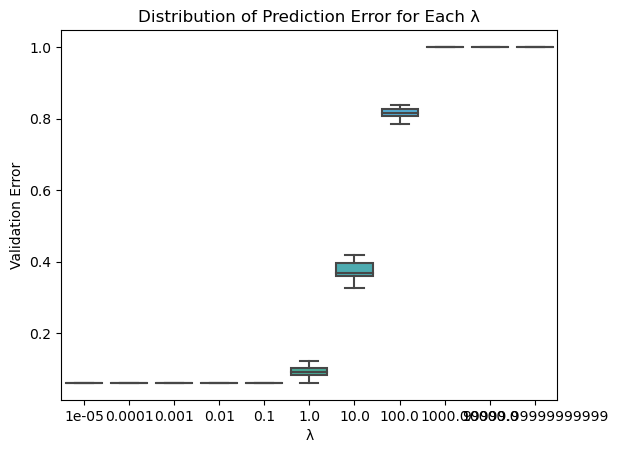

In [126]:
plt.figure()
sns.boxplot(x='lamda', y='% Coef = 0', data=punto_5_3)
plt.title('Distribution of Prediction Error for Each λ')
plt.xlabel('λ')
plt.ylabel('Validation Error')
plt.show()